# Predict in Production

In [1]:
import requests

## Incorrect (missing params)

In [2]:
url = "http://localhost:8000/predict"

# use the correct REST verb
response = requests.get(url)
response.content

b'{"detail":[{"loc":["query","day_of_week"],"msg":"field required","type":"value_error.missing"},{"loc":["query","time"],"msg":"field required","type":"value_error.missing"}]}'

In [3]:
# this will tell you what is wrong
response.json()

{'detail': [{'loc': ['query', 'day_of_week'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'time'],
   'msg': 'field required',
   'type': 'value_error.missing'}]}

## Correct (params)

In [5]:
params = {
    'day_of_week': 5,
    'time': 4
}

# use the correct REST verb
response = requests.get(url, params)
response.json()

{'wait': 20}

# Model in Production

In [ ]:
# Options

# On premise -> Server running on-site
# IaaS -> Infrastructure as a service
# PaaS -> Platform as a service (Heroku) ⚠️ (500MB limits, Tensorflow is too big)
# IaaS + PaaS = Containers -> Docker - Best of both worlds 🔥 

## Virtualisation

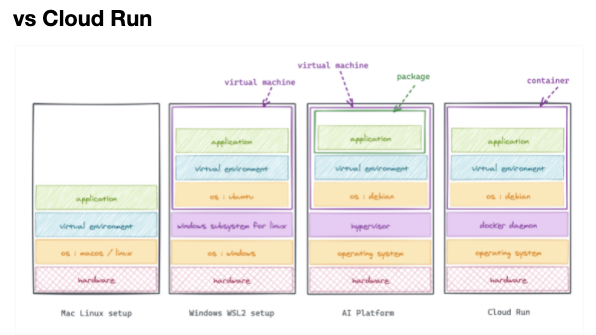

# Docker

In [ ]:
# Container -> Code + Environment + Platform (OS)

If you get the following error:

> Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?

⚠️ Remeber to start the Docker App on your laptop, otherwise it won't work!!

⚠️ And do not leave it Run when not in use -> It will `use lots and lots` of your RAM

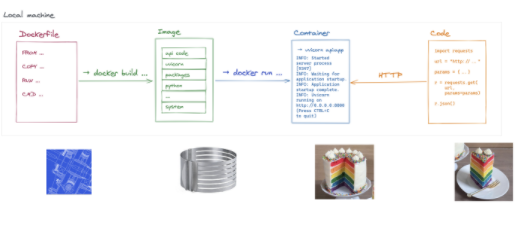

## Dockerfile

In [9]:
# The Blueprint to build the Image

In [17]:
# FROM python:3.8.6-buster

# COPY app /app
# COPY requirements.txt /requirements.txt

# RUN pip install --upgrade pip
# RUN pip install -r requirements.txt

# CMD uvicorn app.simple:app --host 0.0.0.0 

In [24]:
# ---------------- for GCP ----------------

# FROM python:3.8.6-buster

# COPY api /api
# COPY project /project
# COPY model.joblib /model.joblib
# COPY requirements.txt /requirements.txt

# RUN pip install --upgrade pip
# RUN pip install -r requirements.txt

# CMD uvicorn api.simple:app --host 0.0.0.0 --port $PORT

## Docker Image

In [12]:
# The Image has the instructions to create Containers
# Environment + Platform -> Store all the files
# This responds to HTTP requests

### To inspect Docker Images

To remove previous images:

```docker rmi --force $(docker images -q)```

To remove one images:

```docker rmi --force DOCKER_IMAGE_ID```

To see images that have been built

```docker images```

Run the image:

```docker run python:3.8.6-buster```

Run using the interactive mode - and you will be inside the container:

```docker run python:3.8.6-buster sh```

### To build Docker Images interactively

To build the image 🔥

```docker build . -t api```

To run it interactively

```docker run -it api sh```

> you could ```cat requirements.txt``` or any other command as you would run in the terminal

## Docker Container

In [13]:
# Code is ran here
# Use the requests package here

To see the list of containers - and its specs

```docker container ls -a```

### To run the container

Run it when all the 5 directives are written 🔥 🔥

```docker run -p 8080:8000 api```

### To Stop the container

To see containers running

```docker ps```

To stop use the correct CONTAINER ID

```docker stop DOCKER_IMAGE_ID```

Use with caution, only if the image refuses to stop

```docker kill 152e5b79177b```

## Code

In [14]:
#  Whatever you've coded

# Container Registry

## Setting Env Variables -> Params data

### GCP project identifier

In [19]:
# export GCP_PROJECT_ID="replace-me-with-your-project-id"
# echo $GCP_PROJECT_ID

### Docker image name

In [20]:
# export DOCKER_IMAGE_NAME="name-of-my-image-in-kebab-case"
# echo $DOCKER_IMAGE_NAME

### GCP multi-region

In [22]:
# export GCR_MULTI_REGION="eu.gcr.io"  # replace with the appropriate multi-region
# echo $GCR_MULTI_REGION

### GCP region

In [23]:
# export GCR_REGION="europe-west1"  # replace with the appropriate region
# echo $GCR_REGION

## Test Locally

Run to test -> Remember Env Variables are only available on the terminal you add them

```docker build -t $GCR_MULTI_REGION/$GCP_PROJECT_ID/$DOCKER_IMAGE_NAME .```

To run using a specific PORT -> Necessary to run this in GCP ⚠️

```docker run -e PORT=8000 -p 8080:8000 $GCR_MULTI_REGION/$GCP_PROJECT_ID/$DOCKER_IMAGE_NAME```

## Push to GCP

Push Docker Image into Container Registry

```docker push $GCR_MULTI_REGION/$GCP_PROJECT_ID/$DOCKER_IMAGE_NAME```

# Cloud Run

Launch Docker Image from GCP

```gcloud run deploy --image $GCR_MULTI_REGION/$GCP_PROJECT_ID/$DOCKER_IMAGE_NAME --platform managed --region $GCR_REGION```